# Probe sa ficerima

In [3]:
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os


In [4]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [65]:
print(fc.selected)



None


In [66]:
samplerate, data = wavfile.read(fc.selected)
data
len(data)

TypeError: expected str, bytes or os.PathLike object, not NoneType

TypeError: can only concatenate str (not "NoneType") to str

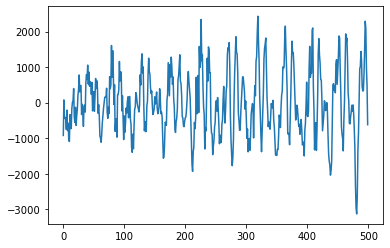

In [67]:
od = 10000
do = 10500
plt.plot(data[od:do])
plt.title("signal " + fc.selected_filename + " " + str(od) + " - " + str(do))
plt.xlabel("vreme[s]")
plt.ylabel("amplituda")
plt.show()

In [ ]:
len(data) * 1/samplerate

2.044125

---

### duzine svih fajlova iz foldera

In [5]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [2]:
duzine1 = []
duzine2 = []

proseci1 = []
proseci2 = []

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort()

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 

          samplerate, data = wavfile.read(fc.selected + filename)
          duzina = len(data) * 1/samplerate

          suma = 0
          for i in data:
             suma += i
          # sm = sum(data)
          avg = suma/len(data);
          # print(suma)
          #W, L, E, A, F, T, N - emocije 

          
          emocija = filename[5]


          print(filename + ": Duzina: ", duzina, " [s] , avg: ", avg)

 

NameError: name 'fc' is not defined

In [ ]:
          
          # if emocija == 'T':
          #      duzine1.append(duzina)
          #      proseci1.append(avg)

          # elif emocija == 'W':
          #      duzine2.append(duzina)
          #      proseci2.append(avg)
               

          # elif emocija == 

In [70]:
duzine1
duzine2

[5.2993125,
 8.97825,
 4.09325,
 3.756375,
 5.905,
 5.9963125,
 4.97625,
 5.4973125,
 5.3410625,
 5.975625]

In [5]:
sns.set()

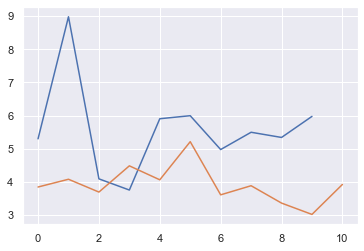

In [6]:
plt.plot(duzine1)
plt.plot(duzine2)


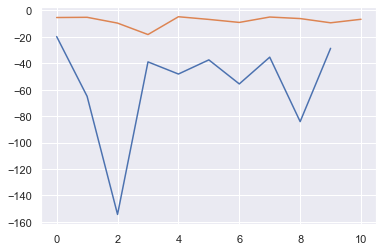

In [7]:
plt.plot(proseci1)
plt.plot(proseci2)

### koliko ima svake emocije ukupno i ostale informacije o tome
---

In [ ]:
# importi
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os

import librosa, librosa.display
import IPython.display as ipd

In [4]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [60]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

duzine_emo = np.empty(7,dtype=object)
energija_emo = np.empty(7,dtype=object)
zero_crossings_emo = np.empty(7,dtype=object)



duzine_emo[:] = [0],[0],[0],[0],[0],[0], [0]
energija_emo[:] = [0],[0],[0],[0],[0],[0], [0]
zero_crossings_emo[:] = [0],[0],[0],[0],[0],[0], [0]


# energija

# short term energija, frejmovano
hop_length = 128
frame_length = 256


for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
      
          # samplerate, data = wavfile.read(fc.selected + filename)
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
            

          # print(suma)
          #      W, L, E, A, F, T, N - emocije 
          emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N']
          
          emocija = filename[5]

          indx = emo.index(emocija)


          # energy = np.array([
          #      sum(abs(data[i:i+frame_length]**2))
          #      for i in range(0, len(data), hop_length)])

          energy = sum(abs(data**2))  ## ukupna energija fajla
          zero_crossings = librosa.zero_crossings(data, pad=False)



          energija_emo[indx].append(energy)
          duzine_emo[indx].append(duzina)
          zero_crossings_emo[indx].append(zero_crossings)
          # print(filename + ": Duzina: ", duzina, " [s]")

 

In [ ]:
duzine_emo


[]

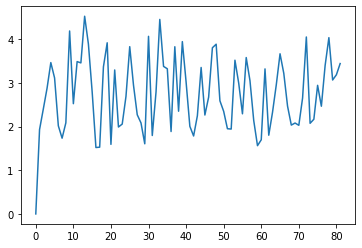

In [37]:
plt.plot(duzine_emo[1])
plt.plot()

In [61]:
# uklanjanje nula
for i in range(0,7):
    duzine_emo[i].pop(0)
    energija_emo[i].pop(0)
    zero_crossings_emo[i].pop(0)

In [ ]:
energija_emo

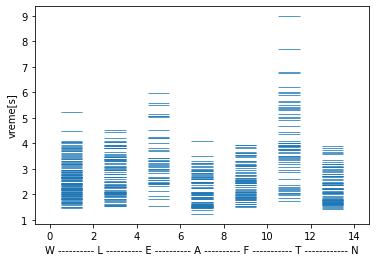

In [55]:
# fensi eventplot da vidimo sve ako bi moglo
# plt.style.use('_mpl-gallery')

# https://matplotlib.org/stable/plot_types/stats/eventplot.html#sphx-glr-plot-types-stats-eventplot-py

fig, ax = plt.subplots()

x = np.arange(1,15,2)

ax.eventplot(duzine_emo, orientation="vertical", lineoffsets=x, linewidth=0.75)

plt.ylabel("vreme[s]")
plt.xlabel("W ---------- L ---------- E ---------- A ---------- F ----------- T ------------ N")


plt.show()

### ,,,,,,,,,,W -- L -- E -- A -- F -- T -- N

In [31]:
for i in range(0,7):
    # duzine_emo[i]
    print(emo[i], " ukupno", round(sum(duzine_emo[i]),4 ), " [s] min:", round(min(duzine_emo[i]),4), " [s] max:", round(max(duzine_emo[i]),4), " [s]" )

W  ukupno 335.3809  [s] min: 1.4658  [s] max: 5.2135  [s]
L  ukupno 225.0971  [s] min: 1.5201  [s] max: 4.5258  [s]
E  ukupno 154.2304  [s] min: 1.5238  [s] max: 5.9638  [s]
A  ukupno 154.103  [s] min: 1.2255  [s] max: 4.1014  [s]
F  ukupno 180.6216  [s] min: 1.4814  [s] max: 3.9309  [s]
T  ukupno 251.2795  [s] min: 1.7357  [s] max: 8.9782  [s]
N  ukupno 186.3796  [s] min: 1.4308  [s] max: 3.8992  [s]


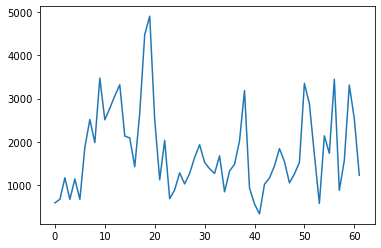

In [50]:
plt.plot(energija_emo[5])

In [26]:
energija_emo.shape
fig = plt.figure(figsize =(10, 7))
type(energija_emo[0])

numpy.ndarray

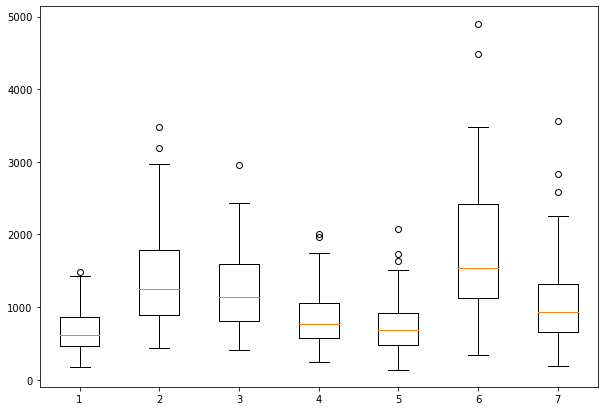

In [48]:
fig = plt.figure(figsize =(10, 7))


plt.boxplot(energija_emo)
plt.show()

### ovde je energija svih fajlova koju smo prvo boxplotovali

In [51]:
energije_ukupne_svi_fajlovi = energija_emo

---

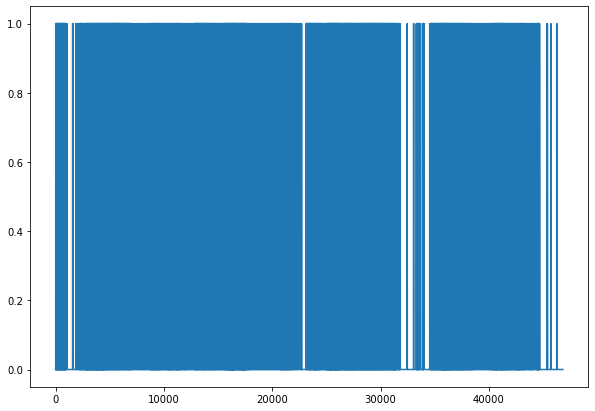

In [67]:
fig = plt.figure(figsize =(10, 7))


# plt.boxplot(zero_crossings_emo[0])
plt.plot(zero_crossings_emo[0])
plt.show()